In [1]:
import random
import os
import sys
import time
import numpy as np
import math

In [2]:
from CurveCGen import *
from CurveEA import *

In [3]:
import subprocess
BLENDER_PATH="C:\\Program Files\\Blender Foundation\\Blender 3.3\\blender.exe"

In [4]:
OUTPUT_PATH="E:\\Research\\Statue Generator\\Generations"

In [5]:
def shannon_entropy(file_path):
    with open(file_path, "rb") as f:
        bytes = f.read()
    prob = [float(bytes.count(b)) / len(bytes) for b in set(bytes)]
    entropy = -sum([p * math.log(p) / math.log(2.0) for p in prob])
    return round(entropy,6)

In [6]:
def calculate_angles(vertices, edges):
    angles = []
    for i, edge in enumerate(edges):
        v1, v2 = edge
        v3 = edges[(i + 1) % len(edges)][1]
        a = math.sqrt((vertices[v2][0] - vertices[v1][0]) ** 2 + (vertices[v2][1] - vertices[v1][1]) ** 2 + (vertices[v2][2] - vertices[v1][2]) ** 2)
        b = math.sqrt((vertices[v3][0] - vertices[v2][0]) ** 2 + (vertices[v3][1] - vertices[v2][1]) ** 2 + (vertices[v3][2] - vertices[v2][2]) ** 2)
        c = math.sqrt((vertices[v3][0] - vertices[v1][0]) ** 2 + (vertices[v3][1] - vertices[v1][1]) ** 2 + (vertices[v3][2] - vertices[v1][2]) ** 2)
        angle = math.acos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))
        angles.append(math.degrees(angle))
    
    angle_bins = {f"{i}-{i+10}": 0 for i in range(0, 351, 10)}
    for angle in angles:
        bin_number = int(angle // 10) * 10
        angle_bins[f"{bin_number}-{bin_number+10}"] = 1
    
    score=0
    for b in angle_bins:
        score+=angle_bins[b]
    
    return round(score/36,6)


In [7]:
def gen_blender(ARR,GEN_NUM):
    
    os.mkdir(OUTPUT_PATH+"\\GEN_"+str(GEN_NUM))
    
    for i,C in enumerate(ARR):
        
        #[r,g,b,a,bd,me,ro,ss,[VERTICES,EDGES],[new_L,new_B,new_H]]

        VERTS=C[8][0]
        EDGES=C[8][1]
        MATERIAL=str([C[0],C[1],C[2],C[3]])
        BD=str(C[4])
        ME=str(C[5])
        RO=str(C[6])
        SS=str(C[7])
        FILE_NUM=str(i)
        
        with open(f'{OUTPUT_PATH}\\GEN_{GEN_NUM}\\VERTS_G{GEN_NUM}_S{i}.txt', 'w') as f:
            f.writelines(str(VERTS))

        subprocess.run(["blender", "--background", "--python","generate.py",FILE_NUM,f'VERTS_G{GEN_NUM}_S{i}.txt',MATERIAL,BD,ME,RO,SS,str(OUTPUT_PATH+"\\GEN_"+str(GEN_NUM))],capture_output=True,shell=True)
        #time.sleep(60)
        
        #print(f'Statue {i} Saved!')

## Basic Parameters for generation

In [8]:
L,B,H=8,10,15
POPULATION_SIZE=10

In [9]:
PARAMS=[]

## Initial Population

In [10]:
%%time

INITIAL_POPULATION=[]

for _ in range(POPULATION_SIZE):
    CH=generate_chromosome(L,B,H)
    INITIAL_POPULATION.append(CH)
    get_stats(CH)
    print('-'*125)

PARAMS.append(INITIAL_POPULATION)

(R, G, B, A) = (0.573454, 0.226644, 0.16099, 0.810015)
Number of vertices = 5
Number of edges = 4
Bevel Depth = 1.18
Metallic = 0.802915
Roughness = 0.229432
Subsurface Level = 0
New Bounding Box - (L,B,H) = (3.609976,5.054021,13.240612)
-----------------------------------------------------------------------------------------------------------------------------
(R, G, B, A) = (0.315997, 0.335334, 0.803731, 0.755623)
Number of vertices = 3
Number of edges = 2
Bevel Depth = 0.77
Metallic = 0.770852
Roughness = 0.494199
Subsurface Level = 2
New Bounding Box - (L,B,H) = (2.410543,4.407504,3.928341)
-----------------------------------------------------------------------------------------------------------------------------
(R, G, B, A) = (0.817466, 0.675464, 0.819214, 0.677595)
Number of vertices = 6
Number of edges = 5
Bevel Depth = 0.96
Metallic = 0.181205
Roughness = 0.295934
Subsurface Level = 0
New Bounding Box - (L,B,H) = (3.031462,4.509853,4.079476)
----------------------------------

In [11]:
%%time

os.mkdir(OUTPUT_PATH+"\\GEN_0")

for i,C in enumerate(PARAMS[0]):

    VERTS=C[8][0]
    EDGES=C[8][1]
    MATERIAL=str([C[0],C[1],C[2],C[3]])
    BD=str(C[4])
    ME=str(C[5])
    RO=str(C[6])
    SS=str(C[7])
    FILE_NUM=str(i)
    
    with open(f'{OUTPUT_PATH}\\GEN_0\\VERTS_G{0}_S{i}.txt', 'w') as f:
        f.writelines(str(VERTS))

    #subprocess.run(["blender", "--background", "--python","convexGeneratePopulation.py",FILE_NUM,f'VERTS_G{GEN_NUM}_S{i}.txt',f'FACES_G{GEN_NUM}_S{i}.txt',f'MATERIALS_G{GEN_NUM}_S{i}.txt',str(RO),str(OUTPUT_PATH+"\\GEN_"+str(GEN_NUM))],capture_output=True,shell=True)
    subprocess.run(["blender", "--background", "--python","generate.py",FILE_NUM,f'VERTS_G0_S{i}.txt',MATERIAL,BD,ME,RO,SS,str(OUTPUT_PATH+"\\GEN_0")],capture_output=True,shell=True)
    #subprocess.run(["blender", "--background", "--python","convexGeneratePopulation.py",FILE_NUM,f'VERTS_G{0}_S{i}.txt',f'FACES_G{0}_S{i}.txt',f'MATERIALS_G{0}_S{i}.txt',str(RO),str(OUTPUT_PATH+"\\GEN_0")],capture_output=True,shell=True)
    #print(subprocess.run(["blender", "--background", "--python","generatePopulation.py",FILE_NUM,COLOUR,f'VERTS_G{0}_S{i}.txt',f'FACES_G{0}_S{i}.txt',str(RO),str(OUTPUT_PATH+"\\GEN_0")],capture_output=True,shell=True))
    #time.sleep(60)
    
    print(f'Statue {i} Saved!')
    

Statue 0 Saved!
Statue 1 Saved!
Statue 2 Saved!
Statue 3 Saved!
Statue 4 Saved!
Statue 5 Saved!
Statue 6 Saved!
Statue 7 Saved!
Statue 8 Saved!
Statue 9 Saved!
Wall time: 41 s


## Crossover and Mutation for more generations

In [16]:
GENERATIONS=300

In [20]:
%%time

ALL_FITNESS=[]
BEST_FITNESS=[]
GEN_NUM=1

for _ in range(GENERATIONS):
    
    PATH_FOR_PREV_GEN=OUTPUT_PATH+"\\GEN_"+str(GEN_NUM-1)
    FITNESS=[]
    
    for i in range(POPULATION_SIZE):
        
        entropy=shannon_entropy(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")
        entropy=entropy/8
        
        fitness=entropy
        FITNESS.append(round(fitness,6))
    
    ALL_FITNESS.append(FITNESS)
    
    BEST_FITNESS.append(FITNESS.index(max(FITNESS)))
    print(f'Statue-{FITNESS.index(max(FITNESS))} has the best fitness value in {GEN_NUM-1} generation.')
    
    MODELS=[]
    
    for _ in range(int(POPULATION_SIZE/2)):
    
        #selecting 2 random parents from previous generation
        idx1,idx2=random.randint(0,POPULATION_SIZE-1),random.randint(0,POPULATION_SIZE-1)
        p1=idx1 if FITNESS[idx1]>FITNESS[idx2] else idx2
        
        idx3,idx4=random.randint(0,POPULATION_SIZE-1),random.randint(0,POPULATION_SIZE-1)
        p2=idx3 if FITNESS[idx3]>FITNESS[idx4] else idx4
        
        #perform crossover for the selected parents
        c1,c2=crossover(PARAMS[GEN_NUM-1][p1],PARAMS[GEN_NUM-1][p2])
        
        #mutate the children after crossover
        m1=mutate(c1,L,B,H)
        m2=mutate(c2,L,B,H)
        
        MODELS.append(m1)
        MODELS.append(m2)
        
    #print(len(MODELS))
    #appending the mutated childs to PARAMS array
    PARAMS.append(MODELS)
    
    #generate blender file
    gen_blender(MODELS,GEN_NUM)
    
    print(f"Generation {GEN_NUM} generated successfully!")
    print("-"*120)
    
    GEN_NUM+=1

Statue-6 has the best fitness value in 0 generation.
Generation 1 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-8 has the best fitness value in 1 generation.
Generation 2 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-3 has the best fitness value in 2 generation.
Generation 3 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-5 has the best fitness value in 3 generation.
Generation 4 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-2 has the best fitness value in 4 generation.
Generation 5 generated successfully!
------------------------------------------------------------------

Statue-8 has the best fitness value in 39 generation.
Generation 40 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-4 has the best fitness value in 40 generation.
Generation 41 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-1 has the best fitness value in 41 generation.
Generation 42 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-6 has the best fitness value in 42 generation.
Generation 43 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-8 has the best fitness value in 43 generation.
Generation 44 generated successfully!
--------------------------------------------------------

Statue-0 has the best fitness value in 78 generation.
Generation 79 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-2 has the best fitness value in 79 generation.
Generation 80 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-4 has the best fitness value in 80 generation.
Generation 81 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-8 has the best fitness value in 81 generation.
Generation 82 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-3 has the best fitness value in 82 generation.
Generation 83 generated successfully!
--------------------------------------------------------

Statue-4 has the best fitness value in 117 generation.
Generation 118 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-1 has the best fitness value in 118 generation.
Generation 119 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-8 has the best fitness value in 119 generation.
Generation 120 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-8 has the best fitness value in 120 generation.
Generation 121 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-4 has the best fitness value in 121 generation.
Generation 122 generated successfully!
----------------------------------------------

Generation 156 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-6 has the best fitness value in 156 generation.
Generation 157 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-3 has the best fitness value in 157 generation.
Generation 158 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-7 has the best fitness value in 158 generation.
Generation 159 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-8 has the best fitness value in 159 generation.
Generation 160 generated successfully!
-----------------------------------------------------------------------------------------------------

Statue-0 has the best fitness value in 194 generation.
Generation 195 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-3 has the best fitness value in 195 generation.
Generation 196 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-6 has the best fitness value in 196 generation.
Generation 197 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-5 has the best fitness value in 197 generation.
Generation 198 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-1 has the best fitness value in 198 generation.
Generation 199 generated successfully!
----------------------------------------------

Generation 233 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-8 has the best fitness value in 233 generation.
Generation 234 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-8 has the best fitness value in 234 generation.
Generation 235 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-9 has the best fitness value in 235 generation.
Generation 236 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-3 has the best fitness value in 236 generation.
Generation 237 generated successfully!
-----------------------------------------------------------------------------------------------------

Statue-4 has the best fitness value in 271 generation.
Generation 272 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-3 has the best fitness value in 272 generation.
Generation 273 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-6 has the best fitness value in 273 generation.
Generation 274 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-1 has the best fitness value in 274 generation.
Generation 275 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-7 has the best fitness value in 275 generation.
Generation 276 generated successfully!
----------------------------------------------

In [22]:
%%time
PATH_FOR_PREV_GEN=OUTPUT_PATH+"\\GEN_"+str(GENERATIONS)
FINAL_FITNESS=[]

for i in range(POPULATION_SIZE):

    entropy=shannon_entropy(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")
    entropy=entropy/8

    FINAL_FITNESS.append(round(entropy,6))

Wall time: 2.04 s


In [23]:
FINAL_FITNESS

[0.32613,
 0.326525,
 0.327195,
 0.325801,
 0.325955,
 0.325016,
 0.324187,
 0.327168,
 0.327437,
 0.326455]

In [24]:
ALL_FITNESS.append(FINAL_FITNESS)

In [25]:
FINAL_FITNESS.index(max(FINAL_FITNESS))

8

## Plot fitness

In [26]:
import matplotlib.pyplot as plt
def plot_fitness(fitness):
    
    best_values=[]
    for g in fitness:
        best_values.append(max(g))
    
    plt.figure(figsize=(20,10))
    plt.plot(best_values)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.show()

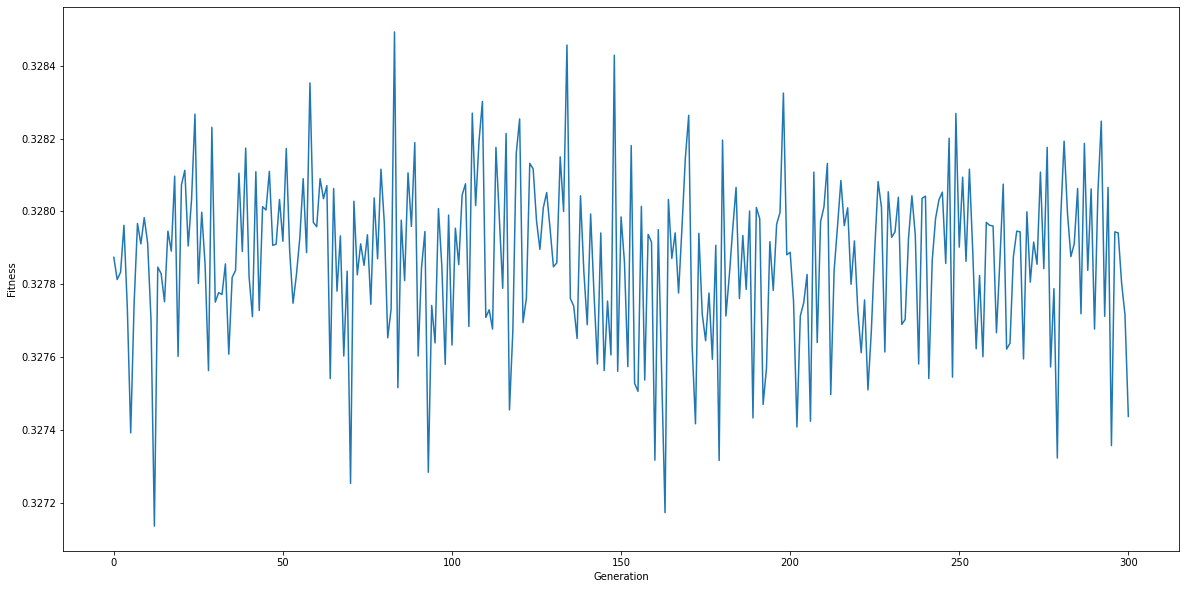

In [27]:
plot_fitness(ALL_FITNESS)

## Saving the parameters

In [28]:
with open(f'E:\Research\Statue gen output\\Curve_300Gen.txt', 'w') as f:
        f.writelines(str(PARAMS))